In [2]:
#NB bruk myspss channel!
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pyreadstat
import file as f
from file import plot
import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Kode-tips
file variablen inneholder sti til spss data. Hvis du vil lage en link: [vg](https://www.vg.no/). Skråskrift er *slik*, bold skrift er **slik**

* kkjk
* ljkkj

In [3]:
x=np.array([3,3,3,3,3,float('NaN'),3,float('NaN')])
print(x)
print(np.mean(x)) # dette vil gi nan
print(np.nanmean(x)) # dette vil fjerne alle NaN før gjennomsnitt blir tatt

[ 3.  3.  3.  3.  3. nan  3. nan]
nan
3.0


# FIRST 

## Deskriptiv statistikk 

#Henter ikke spss filer.. hva er galt?

In [8]:
path="//ihelse.net/Forskning/hst/ID1321/"

FIRST_combined = f.get_combined_data(path, subname= "FIRST", avoid_folder= "Gamle",debug=True)


starting..
finnished..


In [6]:
mappe="//ihelse.net/Forskning/hst/ID1321/"
mappe='../data/'
print(os.getcwd())
df=pd.read_spss(mappe+"FIRST_test_python_2022.01.20.sav")

/mnt/c/Users/2902412/git_repo/polar_api/analyse


In [7]:
print(df.columns)

Index(['ID', 'Age', 'Gender', 'Intervention_Type', 'Height',
       'Highest_education', 'Highest_education_yr', 'Work_status_adm',
       'Livingsituation_adm', 'Activity_prior_frequency_adm',
       ...
       'GripStrength_avg_R_adm', 'GripStrength_avg_L_adm', 'Dominant_hand',
       'VO2peak_Date_adm', 'VO2peak_adm_ReasonNotDone_adm', 'VO2peak_adm',
       'VO2_HR_end_adm', 'VO2_Recovery_HR_1min_adm',
       'VO2_Recovery_HR_2min_adm', 'VO2_termination_reason_adm'],
      dtype='object', length=170)


In [8]:
np.mean(df['Age'])

62.8

#Hvordan finne antall kvinner og prosent kvinner?

In [9]:
a=df['Gender'].value_counts()
a['Male']/(a['Male']+a['Female'])

0.68

In [25]:
mappe="//ihelse.net/Forskning/hst/ID1321/"
files=["FIRST_ADM_2022.01.18.sav"]
middel,stand=f.gjennomsnitt_test(files,columns=["Age","Height"])

reading file  FIRST_ADM_2022.01.18.sav
Age  middelverdi=  65.96 standardavvik=  14.901006677402705
Height  middelverdi=  176.54166666666666 standardavvik=  8.963593838006808


In [8]:
df['Gender'][df['Gender']==1]

Series([], Name: Gender, dtype: category
Categories (2, object): ['Female', 'Male'])

In [6]:
gjennomsnitt_test(files=["FIRST_ADM_2022.01.18.sav","FIRST_wk1_2022.01.18.sav","FIRST_wk2_2022.01.18.sav",
       "FIRST_wk3_2022.01.18.sav","FIRST_wk4_2022.01.18.sav","FIRST_wk5_2022.01.18.sav","FIRST_DC_2022.01.18.sav",
       "FIRST_3M_2022.01.18_1.sav"])

NameError: name 'gjennomsnitt_test' is not defined

### Oversikt fysiotimer
Søke igjennom Excel filer som begynner på **Clinical** for hver enkelt deltager for å 
* finne gjennomsnittlig treningssone som % av HR max
* finne % tid i treningssone >=70% HRmax

In [18]:
path="Z:\\"

combined = f.get_combined_data(path, subname = "Clinical", avoid_folder = "Gamle",debug=True)




starting..
Reading  Clinical_6001_2022.01.11.xlsx , shape= (9, 40)
Reading  Clinical_6002_2022.01.11.xlsx , shape= (10, 40)
Reading  Clinical_6003_2022.01.11.xlsx , shape= (8, 40)
Reading  Clinical_6004_2022.01.11.xlsx , shape= (15, 40)
Reading  Clinical_6005_2022.01.17.xlsx , shape= (29, 40)
Reading  Clinical_6006_22.01.11.xlsx , shape= (7, 40)
Reading  Clinical_6007_22.01.11.xlsx , shape= (22, 40)
Reading  Clinical_6008_22.01.11.xlsx , shape= (10, 40)
Reading  Clinical_6009_22.01.11.xlsx , shape= (29, 40)
Reading  Clinical_6010_22.01.11.xlsx , shape= (10, 40)
Reading  Clinical_6011_22.01.11.xlsx , shape= (25, 40)
Reading  Clinical_6012_22.01.11.xlsx , shape= (37, 40)
Reading  Clinical_6013_22.01.11.xlsx , shape= (12, 40)
Reading  Clinical_6014_22.01.11.xlsx , shape= (36, 40)
Reading  Clinical_6015_22.01.11.xlsx , shape= (13, 40)
Reading  Clinical_6016_22.01.11.xlsx , shape= (17, 40)
Reading  Clinical_6017_22.01.11.xlsx , shape= (15, 40)
Reading  Clinical_6018_22.01.11.xlsx , shape= (

In [19]:
print(combined.columns)

Index(['ID', 'HR_max', 'Betablocker', 'Nr_treatment', 'Site', 'Date',
       'reason_cancelled', 'starttime', 'Endtime', 'Polar_time',
       'Time_in_zone', 'treatment_time', 'percent_time_in_zone', 'Peak_HR',
       'Avg_HR', 'RPE_mean', 'Time_RPE_target', 'HIGT_percent', 'GT_percent',
       'Lex_percent', 'Uex_percent', 'Transfers_percent', 'Wheelchair_percent',
       'Balance_percent', 'stb_persent', 'outcome_percent', 'passive_percent',
       'session_percent', 'HIGT_min', 'GT_min', 'Lex_min', 'Uex_min',
       'UexTS_min', 'Transfers_min', 'Wheelchair_min', 'Balance_min',
       'outcome_min', 'Passive_min', 'Other_min', 'Other_comment'],
      dtype='object')


### Prosentandel treningstype
Finner prosentandel treningstyper i behandling av typen i forhold til registrert Polartid

# må legge inn en if Polar_time =0 så ignorer
Dette er tilfeller hvor polarklokken ikke er satt på

# sum_treningstyper=sum('HIGT_min','GT_min','Lex_min','Uex_min',
       'UexTS_min', 'Transfers_min', 'Wheelchair_min', 'Balance_min',
       'outcome_min', 'Passive_min)

In [20]:
# sjekk om rett tidsformat hh:mm:ss
col='Polar_time'
PT=combined[col]
ID=combined['ID']
val=[not isinstance(PTi, datetime.time) for PTi in PT]
print('Disse ID ' + str(np.unique((ID[val])))+'  nr har ikke korrekt ' + col )

Disse ID [6004. 6005. 6006. 6007. 6009. 6010. 6011. 6012. 6013. 6014. 6015. 6016.
 6017. 6018. 6019. 6020. 6021. 6022.   nan]  nr har ikke korrekt Polar_time


In [21]:
ID,HIGT_percent=f.gen_percent(combined, teller="HIGT_min",nevner="Polar_time")
print ('Percent of exercise are high intensity gait training are {:.4}'.format(np.nanmean(HIGT_percent)))


Percent of exercise are high intensity gait training are 0.0


In [22]:

ID,GT_percent=f.gen_percent(combined, teller="GT_min",nevner="Polar_time")
print ('Percent of exercise are gait training are {:.4}'.format(np.nanmean(GT_percent)))


Percent of exercise are gait training are 26.74


In [23]:
GTtid_mean=np.nanmean(f.convert_if_datetime(combined["GT_min"]))
GTtid_std=np.nanstd(f.convert_if_datetime(combined["GT_min"]))
print('Mean time gait training for all participants are {:.4} min, std {:.4}'.format(GTtid_mean, GTtid_std))

Mean time gait training for all participants are 8.548 min, std 12.3


In [24]:
ID,Lex_percent=f.gen_percent(combined, teller="Lex_min",nevner="Polar_time")
#print(Lex_percent)
print ('Percent of exercise in lower exremities are {:.4}'.format(np.nanmean(Lex_percent)))

Percent of exercise in lower exremities are 5.561


In [25]:
Lex_tid_mean=np.nanmean(f.convert_if_datetime(combined["Lex_min"]))
Lex_tid_std=np.nanstd(f.convert_if_datetime(combined["Lex_min"]))
print('Mean time lower extremity exercise for all participants are {:.4} min, std {:.4}'.format(Lex_tid_mean, Lex_tid_std))

Mean time lower extremity exercise for all participants are 1.591 min, std 4.702


In [26]:
ID,Uex_percent=f.gen_percent(combined, teller="Uex_min",nevner="Polar_time")
print ('Percent of exercise in upper exremities are {:.4}'.format(np.nanmean(Uex_percent)))

Percent of exercise in upper exremities are 4.952


In [27]:
Uex_tid_mean=np.nanmean(f.convert_if_datetime(combined["Uex_min"]))
Uex_tid_std=np.nanstd(f.convert_if_datetime(combined["Uex_min"]))
print('Mean time upper extremity exercise for all participants are {:.4} min, std {:.4}'.format(Uex_tid_mean, Uex_tid_std))

Mean time upper extremity exercise for all participants are 1.624 min, std 6.641


In [28]:
ID,UexTS_percent=f.gen_percent(combined, teller="UexTS_min",nevner="Polar_time")
print ('Percent of upper extremity task spesific exercise are {:.4}'.format(np.nanmean(UexTS_percent)))

Percent of upper extremity task spesific exercise are 3.447


In [29]:
UexTS_min_mean=np.nanmean(f.convert_if_datetime(combined["UexTS_min"]))
UexTS_min_std=np.nanstd(f.convert_if_datetime(combined["UexTS_min"]))
print('Mean time upper extremity task spesific exercise for all participants are {:.4} min, std {:.4}'.format(UexTS_min_mean, UexTS_min_std))

Mean time upper extremity task spesific exercise for all participants are 0.9274 min, std 4.609


In [30]:
ID,Transfers_percent=f.gen_percent(combined, teller="Transfers_min",nevner="Polar_time")
print ('Percent of transfers exercise are {:.4}'.format(np.nanmean(Transfers_percent)))

Percent of transfers exercise are 2.436


In [31]:
Transfers_min_mean=np.nanmean(f.convert_if_datetime(combined["Transfers_min"]))
Transfers_min_std=np.nanstd(f.convert_if_datetime(combined["Transfers_min"]))
print('Mean transfers exercise for all participants are {:.4} min, std {:.4}'.format(Transfers_min_mean, Transfers_min_std))

Mean transfers exercise for all participants are 0.7984 min, std 3.315


In [32]:
ID,Wheelchair_percent=f.gen_percent(combined, teller="Wheelchair_min",nevner="Polar_time")
print ('Percent of Wheelchair exercise are {:.4}'.format(np.nanmean(Wheelchair_percent)))

Percent of Wheelchair exercise are 0.1359


In [33]:
Wheelchair_min_mean=np.nanmean(f.convert_if_datetime(combined["Wheelchair_min"]))
Wheelchair_min_std=np.nanstd(f.convert_if_datetime(combined["Wheelchair_min"]))
print('Mean time wheelchair exercise for all participants are {:.4} min, std {:.4}'.format(Wheelchair_min_mean, Wheelchair_min_std))

Mean time wheelchair exercise for all participants are 0.05376 min, std 0.637


In [34]:
ID,Balance_percent=f.gen_percent(combined, teller="Balance_min",nevner="Polar_time")
print ('Percent of balance exercise are {:.4}'.format(np.nanmean(Balance_percent)))

Percent of balance exercise are 10.75


In [35]:
Balance_min_mean=np.nanmean(f.convert_if_datetime(combined["Balance_min"]))
Balance_min_std=np.nanstd(f.convert_if_datetime(combined["Balance_min"]))
print('Mean time balance exercise for all participants are {:.4} min, std {:.4}'.format(Balance_min_mean, Balance_min_std))

Mean time balance exercise for all participants are 2.255 min, std 6.588


In [36]:
ID,Passive_percent=f.gen_percent(combined, teller="Passive_min",nevner="Polar_time")
print ('Percent of Passive treatment are {:.4}'.format(np.nanmean(Passive_percent)))

Percent of Passive treatment are 9.054


In [37]:
Passive_min_mean=np.nanmean(f.convert_if_datetime(combined["Passive_min"]))
Passive_min_std=np.nanstd(f.convert_if_datetime(combined["Passive_min"]))
print('Mean time passive treatment for all participants are {:.4} min, std {:.4}'.format(Passive_min_mean, Passive_min_std))

Mean time passive treatment for all participants are 0.8817 min, std 3.662


In [38]:
outcome_min_mean=np.nanmean(f.convert_if_datetime(combined["outcome_min"]))
outcome_min_std=np.nanstd(f.convert_if_datetime(combined["outcome_min"]))
print('Mean time outcome measure for all participants are {:.4} min, std {:.4}'.format(outcome_min_mean, outcome_min_std))

Mean time outcome measure for all participants are 20.98 min, std 30.36


In [39]:
ID,outcome_percent=f.gen_percent(combined, teller="outcome_min",nevner="Polar_time")
print ('Percent of outcome measure are {:.4}'.format(np.nanmean(outcome_percent)))

Percent of outcome measure are 77.8


### Kakediagram treningstyper

[ 0.         26.74343546  5.56107755  4.95236176  3.44665988  2.43639679
  0.13594899 10.75054812 77.79714235  9.05421537]


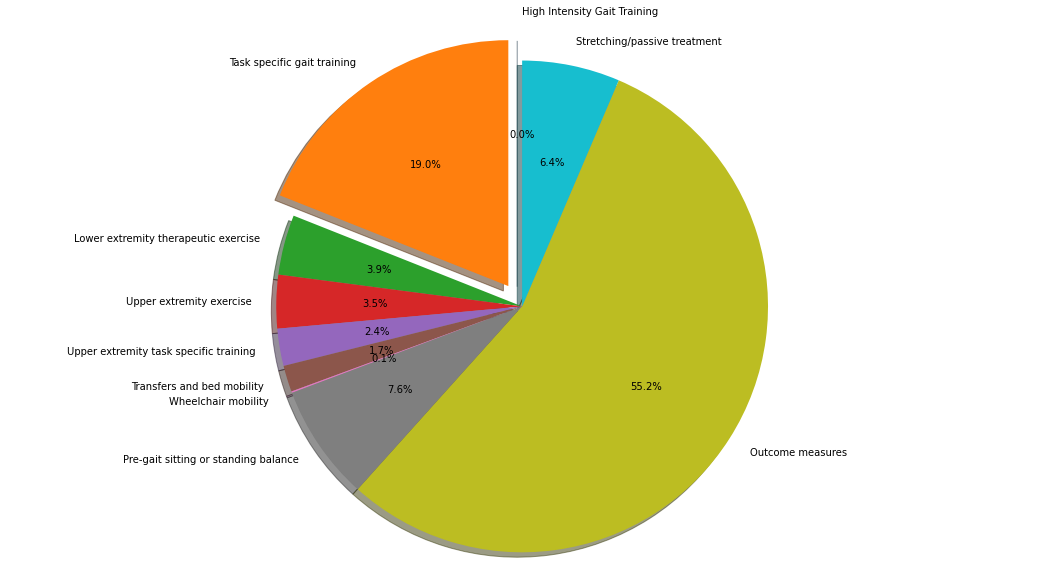

In [40]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'High Intensity Gait Training','Task specific gait training','Lower extremity therapeutic exercise','Upper extremity exercise','Upper extremity task specific training','Transfers and bed mobility','Wheelchair mobility','Pre-gait sitting or standing balance','Outcome measures','Stretching/passive treatment'

sizes = [HIGT_percent,GT_percent,Lex_percent,Uex_percent,UexTS_percent,Transfers_percent,Wheelchair_percent, Balance_percent, outcome_percent,Passive_percent]
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
print(np.nanmean(sizes,axis=1))
fig1, ax1 = plt.subplots()

ax1.pie(np.nanmean(sizes,axis=1), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.set_size_inches(18.5, 10.5)
plt.show()

Other er ikke med i Polar-tiden her inngår BT måling, transport, rydding, snakking

In [74]:
Other_min_mean=np.nanmean(f.convert_if_datetime(combined["Other_min"]))
Other_min_std=np.nanstd(f.convert_if_datetime(combined["Other_min"]))
print('Mean time other treatment including talking, BP, cleaning, transportation for all participants are {:.4} min, std {:.4}'.format(Other_min_mean, Other_min_std))

Mean time other treatment including talking, BP, cleaning, transportation for all participants are 5.363 min, std 7.325


In [41]:
#print(f.convert_if_datetime(combined["Polar_time"]))

treningstid_mean=np.nanmean(f.convert_if_datetime(combined["Polar_time"]))
treningstid_std=np.nanstd (f.convert_if_datetime(combined["Polar_time"]))
print(treningstid_mean)



38.26682340647857


### Pulssone i treningsøktene

In [21]:
f.gen_percent(combined, ID=6017,teller="Avg_HR",nevner="HR_max")

(array([6017]), array([60.45966229]))

Oversikt over treningspuls for alle deltagere 

In [42]:
ID,hr=f.gen_percent(combined,teller="Avg_HR",nevner="HR_max")
print(ID)
print(hr)
treningspuls_mean=np.nanmean(hr)
treningspuls_std=np.nanstd(hr)
print('middelverdi',np.nanmean(hr)) # middelverdi uten nan (missing data, nan=Not a Number)
print('maxverdi',np.nanmax(hr))
print('minverdi',np.nanmin(hr))
#print("{:.2f}".format(a))
print('Mean exercise HR for all participants are {:.1f} % of HRmax, std {:.1f}'.format(treningspuls_mean, treningspuls_std))
#print('std {:.1f}'.format(treningspuls_std))

[6001 6002 6003 6004 6005 6006 6007 6008 6009 6010 6011 6012 6013 6014
 6015 6016 6017 6018 6019 6020 6021 6022]
[50.64935065 58.94039735 48.23529412 51.76470588 46.42857143 53.6416185
 56.32183908 52.08825847 49.75084712 52.28571429 56.91287879 75.80174927
 55.48862115 40.81081081 49.40600978 55.         60.45966229 48.57389801
 73.60730594 77.43589744 58.28828829 47.03925482]
middelverdi 55.40595333966687
maxverdi 77.43589743589745
minverdi 40.81081081081081
Mean exercise HR for all participants are 55.4 % of HRmax, std 9.2


For å få en oversikt over hvor mye av treningen som foregår i >=70%HRmax hos en deltager tar vi utgangspunkt utregning 
(Time in zone / Time recorded Polar)*100. Dette virker kun hvis format er min i helt tall eller hh.mm.ss

In [31]:
ID,zone=f.gen_percent(combined,ID=6001,teller='Time_in_zone',nevner='Polar_time')
print(ID)
print(zone)

[6001]
[1.33878765]


Ønsker nå å finne hvor mye % som blir brukt i treningssne >70%HR max for alle 

In [44]:
ID_all,zone_all=f.gen_percent(combined,teller='Time_in_zone',nevner='Polar_time')
#print("ID_all",ID_all)
#print("Zone", zone_all)
print('Time used in training zone > 70 % HR max for all participants are: {:.2f} %, stv: {:.2f}'.format(np.mean(zone_all),np.std(zone_all)))
#print("std  {:.2f}".format( np.std(zone_all)))

Time used in training zone > 70 % HR max for all participants are: 10.39 %, stv: 19.29


In [9]:
pd.set_option("display.max_columns", None)
#print(combined.describe())
#print(combined.head())
print("nr 6017: ", combined[["HR_max", "Avg_HR"]][combined["ID"] == 6017])
#f.describe(combined)

#f.combine_files(path, subname = "Clinical", combined_filename = "Clinical_Combined.xlsx", avoid_folder = "Gamle")

nr 6017:      HR_max  Avg_HR
0    164.0   101.0
1    164.0    90.0
2    164.0     NaN
3    164.0     NaN
4    164.0    99.0
5    164.0   106.0
6    164.0   106.0
7    164.0   120.0
8    164.0   108.0
9    164.0   109.0
10   164.0    95.0
11   164.0   101.0
12   164.0    78.0
13   164.0    89.0
14   164.0    87.0


In [20]:
dfxx=pd.read_spss('')
dfxx['Betablocker'].value_counts()

#combined_id=combined[combined["ID"] == 6017]
#combined_id['Betablocker'].value_counts()

2.0    15
Name: Betablocker, dtype: int64

In [17]:
#Oversikt for alle deltagere samlet:
col=['HR_max','Avg_HR']
#pd.set_option("display.max_columns", None)
#print(combined.describe())
print(combined[col].describe())
#print(combined.head())
#Hvis ønskelig med oversikt fra en deltager:
print("nr 6017: ", combined[["HR_max", "Avg_HR"]][combined["ID"] == 6017])

           HR_max      Avg_HR
count  393.000000  308.000000
mean   161.743003   89.402597
std     14.967400   15.563056
min    130.000000   54.000000
25%    147.000000   78.000000
50%    166.000000   88.000000
75%    175.000000  100.250000
max    185.000000  134.000000
nr 6017:      HR_max  Avg_HR
0    164.0   101.0
1    164.0    90.0
2    164.0     NaN
3    164.0     NaN
4    164.0    99.0
5    164.0   106.0
6    164.0   106.0
7    164.0   120.0
8    164.0   108.0
9    164.0   109.0
10   164.0    95.0
11   164.0   101.0
12   164.0    78.0
13   164.0    89.0
14   164.0    87.0


In [11]:
f.statistics_patient(combined, [6017,6001])

-------------------------------------
6017
count    12.000000
mean      4.000000
std       6.410219
min       0.000000
25%       0.000000
50%       1.500000
75%       3.750000
max      21.000000
Name: Time_in_zone, dtype: float64
-------------------------------------
-------------------------------------
6001
count    7.000000
mean     0.428571
std      1.133893
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      3.000000
Name: Time_in_zone, dtype: float64
-------------------------------------


0

## Testresultater
Søke igjennom  spss filer som ligger på `\\ihelse.net\Forskning\hst\ID1321`
 som begynner med 'FIRST' unntatt mappe som inneholder 'Gamle'.

Hente data fra filene som gir oversikt over motorisk progresjon der x- aksen viser dag siden hjerneslag

* Lage ny funksjon for å beregne differanse mellom to datoer slik at jeg får dag siden slag.
 Test_index= `testdate 1`- `Date_stroke` 

SixMWT_index=SixMWT_Date_adm-Date_stroke
SixMWT_index=SixMWT_Date_wk1-Date_stroke
SixMWT_index=SixMWT_Date_wk2-Date_stroke
... osv


In [12]:

columns = ["SixMWT_distance_adm", "SixMWT_distance_wk1", "SixMWT_distance_wk2", "SixMWT_distance_wk3", "SixMWT_distance_wk4", "SixMWT_distance_wk5", "SixMWT_distance_dc", "SixMWT_distance_3m"]


Last inn alle data i pandas dataframe `df`

In [13]:
m,s=gjennomsnitt_test(columns)

reading file  FIRST_ADM_2021.12.06_1.sav
SixMWT_distance_adm  middelverdi=  173.97916666666666 standardavvik=  172.68301439384513
reading file  FIRST_wk1_2021.12.06.sav
SixMWT_distance_wk1  middelverdi=  242.8777777777778 standardavvik=  205.22857717405947
reading file  FIRST_wk2_2021.12.06.sav
SixMWT_distance_wk2  middelverdi=  226.2 standardavvik=  176.75770610263834
reading file  FIRST_wk3_2021.12.03.sav
SixMWT_distance_wk3  middelverdi=  239.15 standardavvik=  161.14349195670297
reading file  FIRST_wk4_2021.11.26.sav
SixMWT_distance_wk4  middelverdi=  287.25 standardavvik=  201.1390480902867
reading file  FIRST_wk5_2021.11.26.sav
SixMWT_distance_wk5  middelverdi=  364.0 standardavvik=  77.78174593052023
reading file  FIRST_DC_2021.12.03.sav
SixMWT_distance_dc  middelverdi=  306.55263157894734 standardavvik=  211.8569285794885
reading file  FIRST_3M_2021.12.14.sav
SixMWT_distance_3m  middelverdi=  491.0625 standardavvik=  136.6440729727105


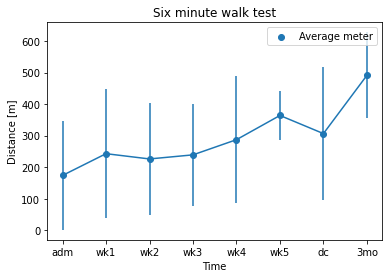

In [14]:
x = ["adm", "wk1", "wk2","wk3","wk4","wk5", "dc", "3mo"]
#plot(x, m, s, title = "Six minute walk test", ymax=700, xlabel = "Time", ylabel = "Distance [m]")
plt.title('Six minute walk test')
plt.xlabel('Time')
plt.ylabel('Distance [m]')
plt.scatter(x,m,label='Average meter')
plt.errorbar(x,m,s)
plt.legend()

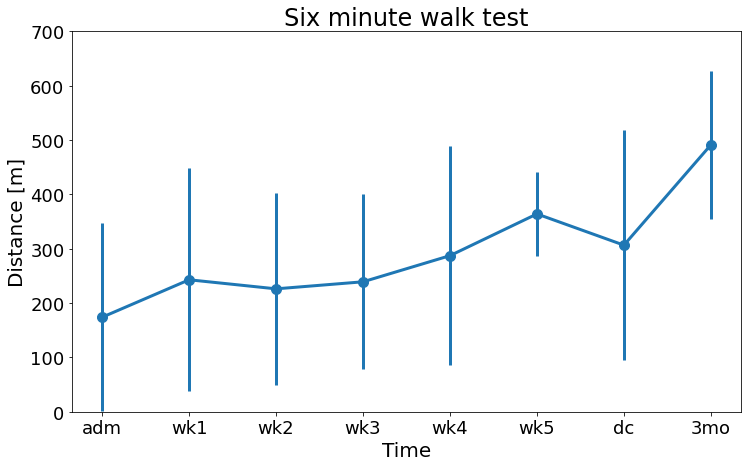

In [15]:
plot(x, m, s, title = "Six minute walk test", ymax=700, xlabel = "Time", ylabel = "Distance [m]")

Henter ut andre kolonner fra SPSS filene

In [16]:

columns = ["BBS_SumScore_adm", "BBS_SumScore_wk1", "BBS_SumScore_wk2", "BBS_SumScore_wk3", "BBS_SumScore_wk4", "BBS_SumScore_wk5", "BBS_SumScore_dc", "BBS_SumScore_3m"]


reading file  FIRST_ADM_2021.12.06_1.sav
BBS_SumScore_adm  middelverdi=  24.916666666666668 standardavvik=  18.99637646606794
reading file  FIRST_wk1_2021.12.06.sav
BBS_SumScore_wk1  middelverdi=  26.0 standardavvik=  17.871066000661518
reading file  FIRST_wk2_2021.12.06.sav
BBS_SumScore_wk2  middelverdi=  31.5625 standardavvik=  19.623009453190406
reading file  FIRST_wk3_2021.12.03.sav
BBS_SumScore_wk3  middelverdi=  34.4 standardavvik=  19.13228800861111
reading file  FIRST_wk4_2021.11.26.sav
BBS_SumScore_wk4  middelverdi=  35.75 standardavvik=  21.360009363293827
reading file  FIRST_wk5_2021.11.26.sav
BBS_SumScore_wk5  middelverdi=  47.5 standardavvik=  4.949747468305833
reading file  FIRST_DC_2021.12.03.sav
BBS_SumScore_dc  middelverdi=  35.25 standardavvik=  20.818261214616363
reading file  FIRST_3M_2021.12.14.sav
BBS_SumScore_3m  middelverdi=  39.72727272727273 standardavvik=  24.18301432448366


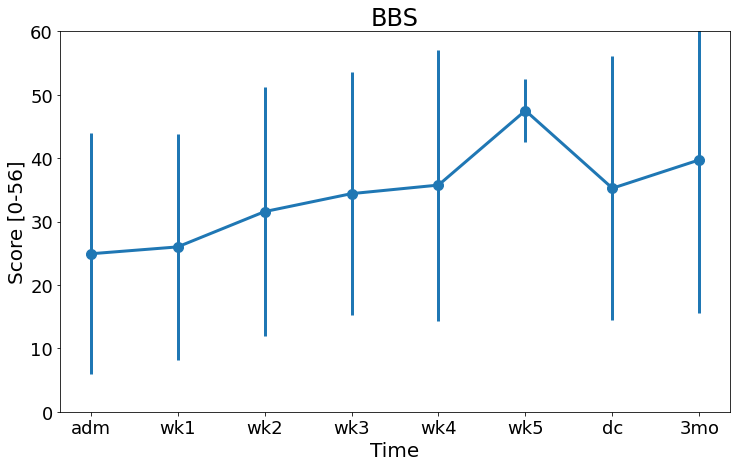

In [17]:
m,s=gjennomsnitt_test(columns)
plot(x, m, s, title = "BBS", ymax=60, xlabel = "Time", ylabel = "Score [0-56]")

reading file  FIRST_ADM_2021.12.06_1.sav
VO2peak_adm  middelverdi=  32.04114285714285 standardavvik=  7.199126507861247
reading file  FIRST_wk1_2021.12.06.sav
VO2peak_wk1  middelverdi=  29.178999999999995 standardavvik=  7.36780451242657
reading file  FIRST_wk2_2021.12.06.sav
VO2peak_wk2  middelverdi=  27.651 standardavvik=  9.034322762541628
reading file  FIRST_wk3_2021.12.03.sav
VO2peak_wk3  middelverdi=  30.538 standardavvik=  10.242539724111397
reading file  FIRST_wk4_2021.11.26.sav
VO2peak_wk4  middelverdi=  26.593333333333334 standardavvik=  12.243403666192393
reading file  FIRST_wk5_2021.11.26.sav
VO2peak_wk5  middelverdi=  18.55 standardavvik=  0.5091168824543134
reading file  FIRST_DC_2021.12.03.sav
VO2peak_dc  middelverdi=  29.31272727272727 standardavvik=  13.524918551258704
reading file  FIRST_3M_2021.12.14.sav
VO2peak_3m  middelverdi=  26.684285714285718 standardavvik=  12.216807898878299


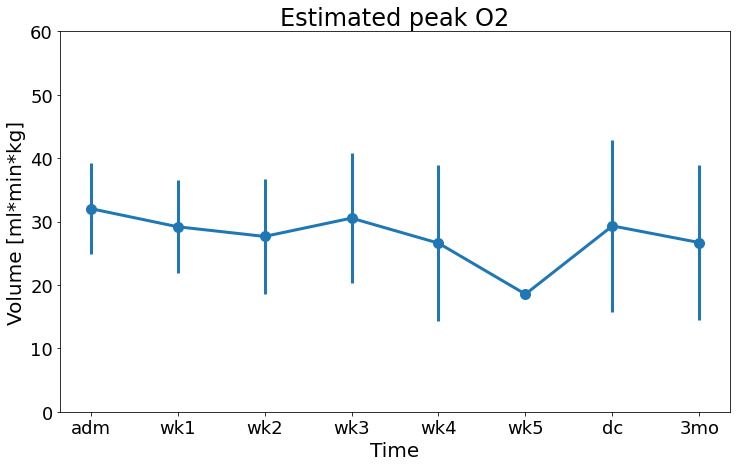

In [18]:
columns = ["VO2peak_adm", "VO2peak_wk1", "VO2peak_wk2", "VO2peak_wk3", "VO2peak_wk4", "VO2peak_wk5", "VO2peak_dc", "VO2peak_3m"]
m,s=gjennomsnitt_test(columns)
plot(x, m, s, title = "Estimated peak O2", ymax=60, xlabel = "Time", ylabel = "Volume [ml*min*kg]")

## Overnight recovery vs orthostatic test Polar Vantage V2


In [52]:
columns = ["Nightly_Recharge_status", "Restitusjon"]
file="Vantage_data_22.01.06.sav"

In [53]:
mappe="//ihelse.net/Forskning/hst/ID1321/"
df=pd.read_spss(mappe+file)
print(df.columns)
df.Nightly_Recharge_status

Index(['ID', 'Age', 'Gender', 'Index1', 'date', 'Polar_aktiv_tid',
       'Activity_steps', 'Activity_zone_ble_ikke_brukt', 'Activity_zone_hvile',
       'Activity_zone_sittende', 'Activity_zone_standing',
       'Activity_zone_walking', 'Activity_zone_running',
       'Kontinuerligpuls_laveste', 'Kontinuerligpuls_høyeste',
       'Timer_nattesøvn', 'Lett_søvn', 'Dyp_søvn', 'REM_søvn', 'Avbrudd_søvn',
       'puls_registrert_hele_natta', 'pul_registrert_hele_dag',
       'Nightly_Recharge_status', 'ANS', 'Sleepscore', 'Sleep_HR', 'Sleep_HRV',
       'Sleep_RF', 'HRV_rest', 'HRV_stand', 'Restitusjon',
       'Status_kardiobelastning', 'VurderingStatusKardiobelastning', 'TRIMP',
       'Belastning', 'Toleranse', 'ADM_6MWT', 'DC_6MWT', 'filter_$'],
      dtype='object')


0      status ikke tilgjengelig
1             bygger basislinje
2             bygger basislinje
3                       Nedsatt
4                       Nedsatt
                 ...           
639                         NaN
640                         NaN
641                         NaN
642                         NaN
643                         NaN
Name: Nightly_Recharge_status, Length: 644, dtype: category
Categories (8, object): ['Dårlig', 'God', 'Nedsatt', 'Ok', 'Svært dårlig', 'Svært god', 'bygger basislinje', 'status ikke tilgjengelig']

0      status ikke tilgjengelig
1             bygger basislinje
2             bygger basislinje
3                       Nedsatt
4                       Nedsatt
                 ...           
639                         NaN
640                         NaN
641                         NaN
642                         NaN
643                         NaN
Name: Nightly_Recharge_status, Length: 644, dtype: category
Categories (8, object): ['Dårlig', 'God', 'Nedsatt', 'Ok', 'Svært dårlig', 'Svært god', 'bygger basislinje', 'status ikke tilgjengelig']

In [49]:
#add a new column category next to the age group. 
category = pd.cut(df.Nightly_Recharge_status,bins=[0,2,5,7],labels=['Dårlig_restituert','Bra restituert','Uklart'])
df.insert(21,'Nightly recharge 3 delt',category)
print(df.columns)

TypeError: '<' not supported between instances of 'int' and 'str'

In [23]:
contab_freq = pd.crosstab(
    df['Nightly_Recharge_status'],
    df['Restitusjon'],
    margins = True
   )
contab_freq

Restitusjon,Ikke restituert,Ikke tilgjengelig,Restituert,All
Nightly_Recharge_status,,,,
Dårlig,5,1,3,9
God,17,6,23,46
Nedsatt,8,2,10,20
Ok,9,2,14,25
Svært dårlig,2,1,3,6
Svært god,2,1,3,6
bygger basislinje,1,13,0,14
status ikke tilgjengelig,11,3,19,33
All,55,29,75,159


In [26]:
pd.crosstab(
    df['Nightly_Recharge_status'],
    df['Restitusjon'],
    margins = True,
    normalize ='index'
   )

Restitusjon,Ikke restituert,Ikke tilgjengelig,Restituert
Nightly_Recharge_status,,,
Dårlig,0.555556,0.111111,0.333333
God,0.369565,0.130435,0.500000
Nedsatt,0.400000,0.100000,0.500000
Ok,0.360000,0.080000,0.560000
Svært dårlig,0.333333,0.166667,0.500000
Svært god,0.333333,0.166667,0.500000
bygger basislinje,0.071429,0.928571,0.000000
status ikke tilgjengelig,0.333333,0.090909,0.575758
All,0.345912,0.182390,0.471698


Henter HRV og innleggelsesdat for å lage plott

In [30]:
x=df['Index1'] # henter ut x-data
y=df['Sleep_HRV'] # henter ut y-data
z=df['Gender']
#plot(x, y, s, title = "HRV", ymax=200, xlabel = "Time [Days]", ylabel = "HRV [ms]")

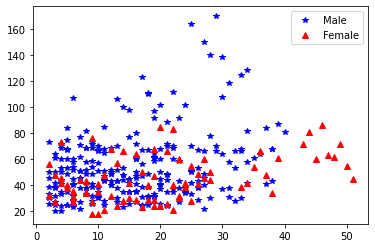

In [48]:
d=y[z=='Male']
e=y[z=='Female']
f=x[z=='Male']
g=x[z=='Female']
plt.plot(f,d,'*',c='b',label='Male')
plt.plot(g,e,'^',c='r',label='Female')
plt.legend()

In [40]:
a=np.array(['Male','Male','Female'])
b=np.array([100,30,50])
c=np.array([1,2,1])

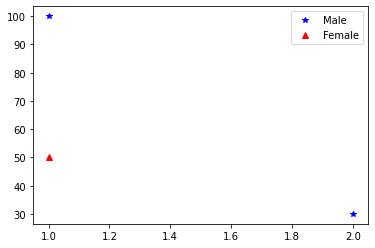

In [47]:
d=b[a=='Male']
e=b[a=='Female']
f=c[a=='Male']
g=c[a=='Female']
plt.plot(f,d,'*',c='b',label='Male')
plt.plot(g,e,'^',c='r',label='Female')
plt.legend()

In [45]:
print(d)
print(e)

[100  30]
[50]
